In [2]:
import pyxdf
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
import mne
import bisect
import os
import re
from scipy.stats import ttest_ind

In [3]:
xdf_path = 'eeg/sub-008_ses-behavioral01_task-Default_run-001_eeg.xdf'
participant = '008'
data, header = pyxdf.load_xdf(xdf_path)

In [5]:
'''old script, might work dont have time to check'''
eeg_stream, marker_stream = None, None
for i, stream in enumerate(data):
    #print(f'{f} -- stream {i}: {stream['info']['name'][0]} - {stream['info']['type'][0]}')
    #if stream['info']['name'][0] == 'eeg':
    #    eeg_stream = stream
    if stream['info']['name'][0] == 'LuckyMarkerStream':
        marker_stream = stream 

if marker_stream == None:
    raise ValueError('no markers')

total_image_count = 0
pics = [x[0] for x in marker_stream['time_series'] if '.' in x[0]]
total_image_count = total_image_count + len(pics)
#get ratings (in order)
ratings = [x[0] for x in marker_stream['time_series'] if 'rating' in x[0]]
#combine both to tie rating to image
combined = list(zip(pics, ratings))
#split into personalized and general based on image extension, save just the rating
general = [int(x[1].split(' ')[1]) for x in combined if 'jpg' in x[0]]
#print(general)
#total_general_count = total_general_count + len(general)
personal = [int(x[1].split(' ')[1]) for x in combined if 'png' in x[0]]
#total_personal_count = total_personal_count + len(personal)
#get count amount of ratings for each set
possible_ratings = np.arange(-5, 6)
g = [general.count(r) for r in possible_ratings]
general_count.append(g)
p = [personal.count(r) for r in possible_ratings]
personal_count.append(p)


index = np.arange(len(possible_ratings))
#create figure
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the bars for each dataset
bar_width = 0.35
bar1 = ax.bar(index - bar_width/2, g, bar_width, label='General Datasets', color='blue')
bar2 = ax.bar(index + bar_width/2, p, bar_width, label='Personal Datasets', color='orange')
# Add labels, title, and legends
ax.set_xlabel('Rating Values', fontsize=12)
ax.set_ylabel('% rated per group', fontsize=12)
ax.set_title('Comparison of Ratings Given in General vs Personal Datasets', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(possible_ratings)
ax.legend()
#show
plt.show()

NameError: name 'general_count' is not defined

In [ ]:
#get all participant files
eeg_path = 'eeg/'
#create regex to match participant files
pattern = re.compile(r'00\d', re.IGNORECASE)
#find participant codes from files
eeg_files = os.listdir(eeg_path)
#datafiles
participant_files = [x for x in eeg_files if pattern.match(x[4:7])]
#participants
participants = [x[x.find('-') + 1:x.find('_')] for x in participant_files]

general_count = []
personal_count = []
total_image_count = 0
total_personal_count = 0
total_general_count = 0
for f in participant_files:
    g, p = [], []
    data, header = pyxdf.load_xdf(f'{eeg_path}{f}')
    eeg_stream, marker_stream = None, None
    for i, stream in enumerate(data):
        print(f'stream {i}: {stream['info']['name'][0]} - {stream['info']['type'][0]}')
        if stream['info']['name'][0] == 'eeg':
            eeg_stream = stream
        if stream['info']['name'][0] == 'LuckyMarkerStream':
            marker_stream = stream
    
    #raise error if no stream
    #if eeg_stream == None:
    #    raise ValueError('no eeg stream')
    if marker_stream == None:
        raise ValueError('no marker stream')  

    pics = [x[0] for x in marker_stream['time_series'] if '.' in x[0]]
    total_image_count = total_image_count + len(pics)
    #get ratings (in order)
    ratings = [x[0] for x in marker_stream['time_series'] if 'rating' in x[0]]
    #combine both to tie rating to image
    combined = list(zip(pics, ratings))
    #split into personalized and general based on image extension, save just the rating
    general = [int(x[1].split(' ')[1]) for x in combined if 'jpg' in x[0]]
    total_general_count = total_general_count + len(general)
    personal = [int(x[1].split(' ')[1]) for x in combined if 'png' in x[0]]
    total_personal_count = total_personal_count + len(personal)
    #get count amount of ratings for each set
    possible_ratings = np.arange(-5, 6)
    g = [general.count(r) for r in possible_ratings]
    general_count.append(g)
    p = [personal.count(r) for r in possible_ratings]
    personal_count.append(p)
    #set positions

total_general = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for p in general_count:
    #print(p)
    for i, rating in enumerate(p):
       total_general[i] = total_general[i] + rating
total_personal = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for p in personal_count:
    print(p)
    for i, rating in enumerate(p):
       total_personal[i] = total_personal[i] + rating
print(total_general)

general_percentages = [(x/total_general_count) * 100 for x in total_general]
personal_percentages = [(x/total_personal_count) * 100 for x in total_personal]


index = np.arange(len(possible_ratings))
#create figure
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the bars for each dataset
bar_width = 0.35
bar1 = ax.bar(index - bar_width/2, general_percentages, bar_width, label='General Datasets', color='blue')
bar2 = ax.bar(index + bar_width/2, personal_percentages, bar_width, label='Personal Datasets', color='orange')
# Add labels, title, and legends
ax.set_xlabel('Rating Values', fontsize=12)
ax.set_ylabel('% rated per group', fontsize=12)
ax.set_title('Comparison of Ratings Given in General vs Personal Datasets', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(possible_ratings)
ax.legend()
#show
plt.show()

In [ ]:

total_pooled = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i, r in enumerate(total_general):
    total_pooled[i] = r + total_personal[i]

total_pooled

In [ ]:
#total (personal + general) 1 rating = 100%

new_total_personal_percentages = [(x/total_pooled[i]) * 100 for i, x in enumerate(total_personal)]
new_total_general_percentages = [(x/total_pooled[i]) * 100 for i, x in enumerate(total_general)]
#general_negative_percentages = [x for i, x in enumerate(general_percentages) if i < 5]
#personal_negative_percentages = [x for i,x in enumerate(personal_percentages) if i < 5]

general_negative_percentages = [x for i, x in enumerate(new_total_general_percentages) if i < 5]
personal_negative_percentages = [x for i,x in enumerate(new_total_personal_percentages) if i < 5]

possible_ratings = np.arange(-5, 0)
index = np.arange(5)
#create figure
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the bars for each dataset
bar_width = 0.35
bar1 = ax.bar(index - bar_width/2, general_negative_percentages, bar_width, label='General Datasets', color='blue')
bar2 = ax.bar(index + bar_width/2, personal_negative_percentages, bar_width, label='Personal Datasets', color='orange')
# Add labels, title, and legends
ax.set_xlabel('Rating Values', fontsize=12)
ax.set_ylabel('Number of Ratings %', fontsize=12)
ax.set_title('Comparison of Ratings Given in General vs Personal Datasets', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(possible_ratings)
ax.legend()
#show
plt.show()

In [ ]:
total_general

In [ ]:
general_count

In [ ]:
#ttest values

general_transpose = np.transpose(np.array(general_count))
personal_transpose = np.transpose(np.array(personal_count))

'''
original: 
[[6, 7, 2, 0, 1, 6, 6, 6, 5, 10, 8],
 [3, 1, 3, 2, 5, 9, 2, 6, 6, 8, 12],
 [5, 4, 6, 5, 0, 4, 6, 6, 8, 11, 2],  
 [4, 8, 2, 3, 3, 11, 7, 7, 6, 6, 0],
 [2, 0, 2, 3, 2, 14, 7, 9, 7, 6, 5],
 [7, 9, 3, 1, 1, 7, 4, 6, 7, 6, 6]]

transpose:

 [[ 5  2  4  5 11  7]
 [ 4  0 10 11  3  9]
 [ 4  7  2  0  4  5]
 [ 0  4  3  0  3  6]
 [ 0  1  1  1  0  1]
 [ 0  5  0  0  3  0]
 [ 2  2  2  1  2  2]
 [ 1  2  1  0  0  4]
 [ 4  6  5  8  2  9]
 [ 9  8  8 13  2  7]
 [24 13 13 10 22  9]]
'''
print("Rating\t\tT-stat\t\tP-value")

for i in range(len(general_transpose)):

    t_stat, p_val = ttest_rel(personal_transpose[i], general_transpose[i])
    print(f"{i - 5:+}\t\t{t_stat:.4f}\t\t{p_val:.4f}\t\t{p_val < 0.05}")



In [9]:
#ttest grouped neg/pos
#[5, 4, 4, 0, 0] --> [-5, -5, -5, -5, -5, -4, -4, -4, -4, -3, -3, -3]
neg_rating_personal_count = []
neg_rating_general_count = []

for i, r in enumerate(personal_count):
    #print(r)
    neg_rating_personal_count.append([x for i, x in enumerate(r) if i < 5])
    neg_rating_general_count.append([x for i, x in enumerate(general_count[i]) if i < 5])
#print('negative rating personal count', neg_rating_personal_count)
#print('negative rating general count', neg_rating_general_count)

multipliers = [-5, -4, -3, -2, -1]
neg_general_total_ratings = []
neg_personal_total_ratings = []

for r in neg_rating_personal_count:
    for i, x in enumerate(r):
        #print(r, i, x)
        rating = -5 + i
        neg_personal_total_ratings.extend([rating] * x)

for r in neg_rating_general_count:
    for i, x in enumerate(r):
        #print(r, i, x)
        rating = -5 + i
        neg_general_total_ratings.extend([rating] * x)
        
print("T-stat\t\tP-value\t\tnegative")
#print(neg_general_total_ratings)
t_stat, p_val = ttest_ind(neg_general_total_ratings, neg_personal_total_ratings)
print(f"{t_stat:.4f}\t\t{p_val:.4f}\t\t{p_val < 0.05}")
#neg_ratings  = []

pos_rating_personal_count = []
pos_rating_general_count = []

#print('ersonal count', personal_count)
for i, r in enumerate(personal_count):
    #print(r)
    pos_rating_personal_count.append([x for i, x in enumerate(r) if i > 5])
    pos_rating_general_count.append([x for i, x in enumerate(general_count[i]) if i > 5])
#print('negative rating personal count', pos_rating_personal_count)
#print('negative rating general count', pos_rating_general_count)

pos_general_total_ratings = []
pos_personal_total_ratings = []

for r in pos_rating_personal_count:
    for i, x in enumerate(r):
        #print(r, i, x)
        rating = i + 1
        #print(f'adding {rating} * {x}')
        pos_personal_total_ratings.extend([rating] * x)

for r in pos_rating_general_count:
    for i, x in enumerate(r):
        #print(r, i, x)
        rating = i + 1
        pos_general_total_ratings.extend([rating] * x)

#print(pos_personal_total_ratings)
print("\nT-stat\t\tP-value\t\tpositive")
#print(neg_general_total_ratings)
t_stat, p_val = ttest_ind(pos_general_total_ratings, pos_personal_total_ratings)
print(f"{t_stat:.4f}\t\t{p_val:.4f}\t\t{p_val < 0.05}")
#neg_ratings  = []



T-stat		P-value		negative
1.6146		0.1075		False

T-stat		P-value		positive
-8.5222		0.0000		True


In [10]:
pos_rating_personal_count = []
pos_rating_general_count = []

for i, r in enumerate(personal_count):

    pos_rating_personal_count.append([x for i, x in enumerate(r) if i > 5])
    pos_rating_general_count.append([x for i, x in enumerate(general_count[i]) if i > 5])
#print('negative rating personal count', pos_rating_personal_count)
#print('negative rating general count', pos_rating_general_count)

multipliers = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
pos_general_total_ratings = [0, 0, 0, 0, 0]
pos_personal_total_ratings = [0, 0, 0, 0, 0]

for r in pos_rating_general_count:
    for i in range(len(r)):
        #print(neg_general_total_ratings[i], i, r)
        pos_general_total_ratings[i] = pos_general_total_ratings[i] + (i-5) * r[i]

for r in pos_rating_personal_count:
    for i in range(len(r)):
        #print(neg_personal_total_ratings[i], i, r)
        pos_personal_total_ratings[i] = pos_personal_total_ratings[i] + (i-5) * r[i]

#print(pos_general_total_ratings)
print("T-stat\t\tP-value")
t_stat, p_val = ttest_ind(pos_general_total_ratings, pos_personal_total_ratings)
print(f"{t_stat:.4f}\t\t{p_val}\t\t{p_val < 0.05}")


T-stat		P-value
-1.4380		0.18837770919496583		False


In [11]:
#total (personal + general) all negative ratings = 100%
  
total_pooled_negative = [x for i, x in enumerate(total_pooled) if i < 5]
total_general_count = sum([x for i, x in enumerate(total_general) if i < 5])
total_personal_count = sum([x for i, x in enumerate(total_personal) if i < 5])
total_neg_count = sum(total_pooled_negative)
new_total_personal_percentages = [(x/total_personal_count) * 100 for i, x in enumerate(total_personal)]
new_total_general_percentages = [(x/total_general_count) * 100 for i, x in enumerate(total_general)]
#general_negative_percentages = [x for i, x in enumerate(general_percentages) if i < 5]
#personal_negative_percentages = [x for i,x in enumerate(personal_percentages) if i < 5]

general_negative_percentages = [x for i, x in enumerate(new_total_general_percentages) if i < 5]
personal_negative_percentages = [x for i,x in enumerate(new_total_personal_percentages) if i < 5]

possible_ratings = np.arange(-5, 0)
index = np.arange(5)
#create figure
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the bars for each dataset
bar_width = 0.35
bar1 = ax.bar(index - bar_width/2, general_negative_percentages, bar_width, label='General Datasets', color='blue')
bar2 = ax.bar(index + bar_width/2, personal_negative_percentages, bar_width, label='Personal Datasets', color='orange')
# Add labels, title, and legends
ax.set_xlabel('Rating Values', fontsize=12)
ax.set_ylabel('Number of Ratings %', fontsize=12)
ax.set_title('Comparison of Ratings Given in General vs Personal Datasets', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(possible_ratings)
ax.legend()
#show
plt.show()

NameError: name 'total_pooled' is not defined

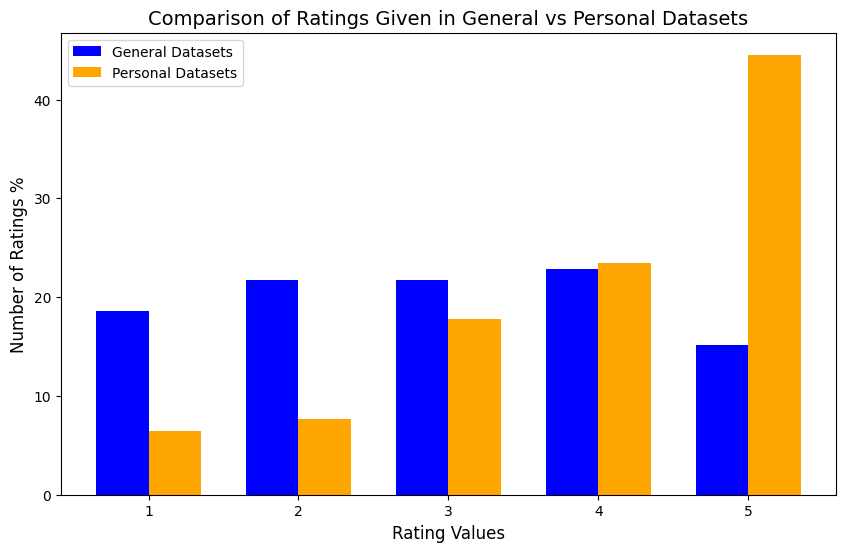

In [12]:
#total (personal + general) all negative ratings = 100%
#total_pooled_negative = [x for i, x in enumerate(total_pooled) if i < 5]
total_general_count = sum([x for i, x in enumerate(total_general) if i > 5])
total_personal_count = sum([x for i, x in enumerate(total_personal) if i > 5])
new_total_personal_percentages = [(x/total_personal_count) * 100 for i, x in enumerate(total_personal)]
new_total_general_percentages = [(x/total_general_count) * 100 for i, x in enumerate(total_general)]
#general_negative_percentages = [x for i, x in enumerate(general_percentages) if i < 5]
#personal_negative_percentages = [x for i,x in enumerate(personal_percentages) if i < 5]

general_negative_percentages = [x for i, x in enumerate(new_total_general_percentages) if i > 5]
personal_negative_percentages = [x for i,x in enumerate(new_total_personal_percentages) if i > 5]

possible_ratings = np.arange(1, 6)
index = np.arange(5)
#create figure
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the bars for each dataset
bar_width = 0.35
bar1 = ax.bar(index - bar_width/2, general_negative_percentages, bar_width, label='General Datasets', color='blue')
bar2 = ax.bar(index + bar_width/2, personal_negative_percentages, bar_width, label='Personal Datasets', color='orange')
# Add labels, title, and legends
ax.set_xlabel('Rating Values', fontsize=12)
ax.set_ylabel('Number of Ratings %', fontsize=12)
ax.set_title('Comparison of Ratings Given in General vs Personal Datasets', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(possible_ratings)
ax.legend()
#show
plt.show()

In [13]:
def closest_point(target, time_stamps):
    #bisect right to prevent cutting into data
    index = bisect.bisect_right(time_stamps, target)
    #insert at the end if last 
    if index == len(time_stamps):
        return len(time_stamps)-1
    #find smallest difference
    if abs(time_stamps[index] - target) < abs(time_stamps[index - 1] - target):
        return index
    return index - 1

eeg_stream, marker_stream = None, None
for i, stream in enumerate(data):
    print(f'stream {i}: {stream['info']['name'][0]} - {stream['info']['type'][0]}')
    if stream['info']['name'][0] == 'eeg':
        eeg_stream = stream
    if stream['info']['name'][0] == 'LuckyMarkerStream':
        marker_stream = stream

#raise error if no stream
if eeg_stream == None:
    raise ValueError('no eeg stream')
if marker_stream == None:
    raise ValueError('no marker stream')  

stream 0: LuckyMarkerStream - Markers


ValueError: no eeg stream

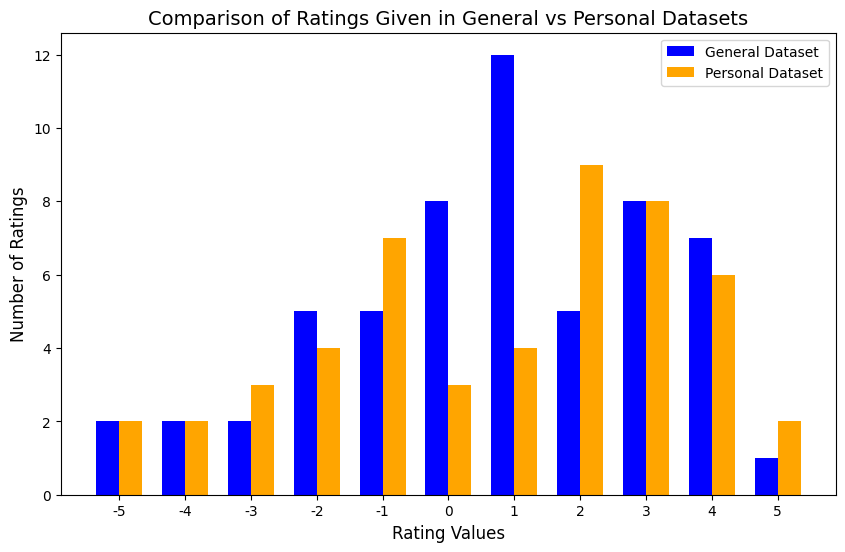

In [14]:
'''RATINGS PER IMAGE GROUP'''
#get images
pics = [x[0] for x in marker_stream['time_series'] if '.' in x[0]]
#get ratings (in order)
ratings = [x[0] for x in marker_stream['time_series'] if 'rating' in x[0]]
#combine both to tie rating to image
combined = list(zip(pics, ratings))
#split into personalized and general based on image extension, save just the rating
general = [int(x[1].split(' ')[1]) for x in combined if 'jpg' in x[0]]
personal = [int(x[1].split(' ')[1]) for x in combined if 'png' in x[0]]
#get count amount of ratings for each set
possible_ratings = np.arange(-5, 6)
general_count = [general.count(r) for r in possible_ratings]
personal_count = [personal.count(r) for r in possible_ratings]
#set positions
index = np.arange(len(possible_ratings))
#create figure
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the bars for each dataset
bar_width = 0.35
bar1 = ax.bar(index - bar_width/2, general_count, bar_width, label='General Dataset', color='blue')
bar2 = ax.bar(index + bar_width/2, personal_count, bar_width, label='Personal Dataset', color='orange')
# Add labels, title, and legends
ax.set_xlabel('Rating Values', fontsize=12)
ax.set_ylabel('Number of Ratings', fontsize=12)
ax.set_title('Comparison of Ratings Given in General vs Personal Datasets', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(possible_ratings)
ax.legend()
#show
plt.show()

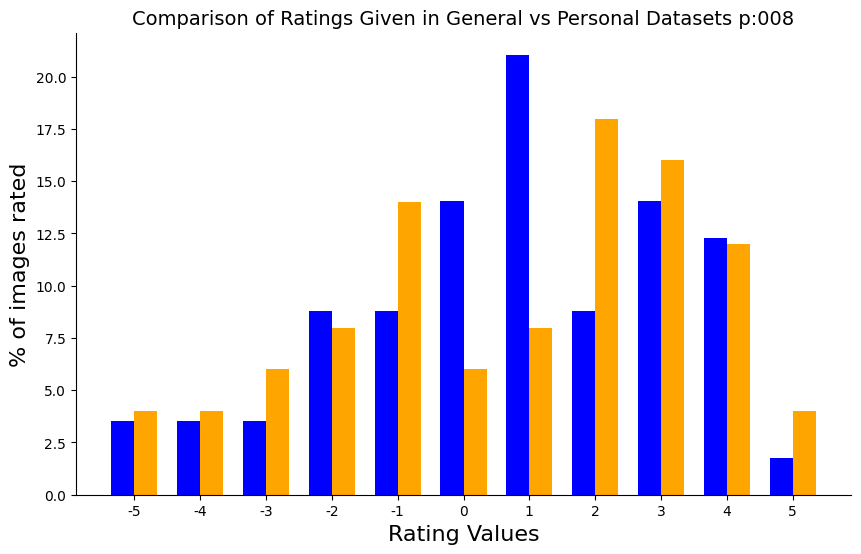

In [15]:
'''RATINGS PER IMAGE GROUP PERCENTAGE'''
#get images
pics = [x[0] for x in marker_stream['time_series'] if '.' in x[0]]
#get ratings (in order)
ratings = [x[0] for x in marker_stream['time_series'] if 'rating' in x[0]]
#combine both to tie rating to image
combined = list(zip(pics, ratings))
#split into personalized and general based on image extension, save just the rating
general = [int(x[1].split(' ')[1]) for x in combined if 'jpg' in x[0]]
personal = [int(x[1].split(' ')[1]) for x in combined if 'png' in x[0]]
#get total amount in each set
total_general = len(general)
total_personal = len(personal)
#get count amount of ratings for each set
possible_ratings = np.arange(-5, 6)
general_count = [general.count(r) for r in possible_ratings]
personal_count = [personal.count(r) for r in possible_ratings]
#calculate percentages
general_percentages = [(x/total_general) * 100 for x in general_count]
personal_percentages = [(x/total_personal) * 100 for x in personal_count]
#set positions
index = np.arange(len(possible_ratings))
#create figure
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the bars for each dataset
bar_width = 0.35
bar1 = ax.bar(index - bar_width/2, general_percentages, bar_width, label='General Dataset', color='blue')
bar2 = ax.bar(index + bar_width/2, personal_percentages, bar_width, label='Personal Dataset', color='orange')
# Add labels, title, and legends
ax.set_xlabel('Rating Values', fontsize=16)
ax.set_ylabel('% of images rated', fontsize=16)
ax.set_title(f'Comparison of Ratings Given in General vs Personal Datasets p:{participant}', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(possible_ratings)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_position(('outward', 100))  # Add padding to the bottom
ax.spines['right'].set_position(('outward', 100)) 
#ax.legend()
#show
plt.show()